# Numpy.Random

## Assignment Details

Problem statement
The following assignment concerns the numpy.random package in Python. You are
required to create a Jupyter notebook explaining the use of the package, including
detailed explanations of at least five of the distributions provided for in the package.
There are four distinct tasks to be carried out in your Jupyter notebook.
1. Explain the overall purpose of the package.
2. Explain the use of the “Simple random data” and “Permutations” functions.
3. Explain the use and purpose of at least five “Distributions” functions.
4. Explain the use of seeds in generating pseudorandom numbers.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

## Overall purpose of the package

Read Numpy paper - https://www.nature.com/articles/s41586-020-2649-2

### What is Numpy?

A Python package that is focused around mathemetical functions and use cases in Python. It introduces the Array data type, which acts like a list, however will only hold one type of data (e.g. a list of integers, or a list of strings). It can also map multiple arrays together to create arrays of 2, 3 and more dimensions. Alongside the Array data type, NumPy is heralded for its speed, especially across larger and larger data sets. As such, it forms the building blocks of other popular data science packages, such as Pandas, which is built on top of NumPy.

### Information on Arrays

Arrays are a list like data type that can only contain one data type within it. This means that a list of mixed data types, e.g. [14, 4.21, 'Hello'] could not be an array. Numpy also makes it easier to map multiple arrays together to create multiple dimensional arrays, for example maybe the X and Y variables of observations, and opens the door for easier plotting. It's therefore very common for a dataset to be turned into a Numpy array before plotting, either directly via NumPy specific functions, or indirectly via other packages such as Pandas (which is built on top of NumPy).

### Statistical uses for Numpy

### Numpy in the industry

Mention NumPy being used in Nobel Prize winning papers

https://iopscience.iop.org/article/10.3847/1538-4357/aaf103
From tweet - https://twitter.com/dvperepelitsa/status/1313487731880865792/photo/1


## Simple Random Data & Permutations

## Distributions

https://towardsdatascience.com/probability-concepts-explained-probability-distributions-introduction-part-3-4a5db81858dc

For some use cases, the user will require a set of pseudorandom numbers that fit a particular distribution, so that it lines up with what they expect to encounter in the real world, or perhaps to see how their analysis will apply to other types of data distribution. Numpy therefore allows the user to specify what type of distribution they would like their pseudorandom data to look like, and provides numerous parameters that allows the users to ensure that the distribution is as closely mirrored to their use case as possible. 

For example, in one of my Normal Distribution examples below, I was able to specify the average height of adult males in Ireland, the standard deviation in adult male height, and the population of adult males in Ireland. The resulting dataset therefore shows that the heights of adult males in Ireland might look like, and while it won't replace a dataset based on actual measurements in any final product, it will give me a dataset that's not too dissimilar from what I can expect, and so any models of visualisation I intend to use can be built with this dataset now, to be adapted and fit to the real dataset in future.

### Normal Distribution

Events are independent, but gathered around the average/median with tails on either side. In a normal distribution 68% of the data lies within 1 standard deviation, and 95% within 2 (practical stats book).


https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.random.normal.html#numpy.random.normal
https://www.mathsisfun.com/data/standard-normal-distribution.html

Examples - Height, shoe size

#### Example 1 - Height of adult males in Ireland.
Average height of an adult male in Ireland is 172cm.

Age of Majority in Ireland is 18 - https://www.citizensinformation.ie/en/birth_family_relationships/children_s_rights_and_policy/children_and_rights_in_ireland.html#:~:text=However%2C%20you%20must%20be%2018%20years%20of%20age%20or%20over.

In 2016 there were 1,745,643 males 18 or older on their last birthday.
https://statbank.cso.ie/px/pxeirestat/Statire/SelectVarVal/saveselections.asp
https://screenshot.click/29_51-0yi51-2eqji.jpg

Average male height is 177cm in 2010
https://www.iuna.net/surveyreports
https://irp-cdn.multiscreensite.com/46a7ad27/files/uploaded/The%20National%20Adult%20Nutrition%20Survey%20Summary%20Report%20March%202011.pdf

Standard deviation is aroung 7.59cm https://ourworldindata.org/human-height

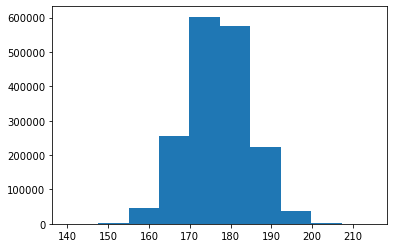

In [3]:
#np.random.normal(mean, standard deviation, size)

population = 1745643

heights = np.random.normal(177, 7.59, population)

plt.hist(heights);

#### Example 2 - Shoe sizes

Average shoe size is around 10 https://www.footsolutions.ie/blog/do-your-shoes-fit-average-foot-size-larger-than-ever-before/

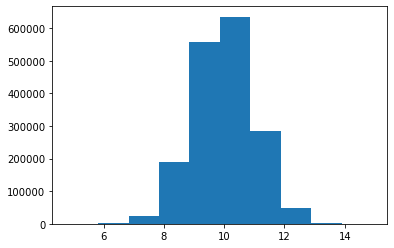

In [4]:
#np.random.normal(mean, standard deviation, size)
shoes = np.random.normal(10, 1, population)

plt.hist(shoes);

### Binomial Distribution 

https://www.mathsisfun.com/data/binomial-distribution.html
https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.random.binomial.html#numpy.random.binomial

Binomial distribution doesn't gave to be equal probability. 1 is often seen as the success value ie. The rarer outcome or outcome of interest. (from Practical Statistics for Data Science - https://www.oreilly.com/library/view/practical-statistics-for/9781491952955/)

example - coin toss, sales conversion, picking cards out of a deck

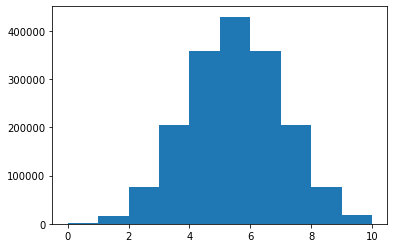

In [5]:

#np.random.binomial(number of trials, probability, size)
# Example 1 - Coin toss - ask every adult male in Ireland to flip a coin 10 times and record the result.

#1 = head, 0 = tail
rolls = np.random.binomial(10, 0.5, population)
plt.hist(rolls);

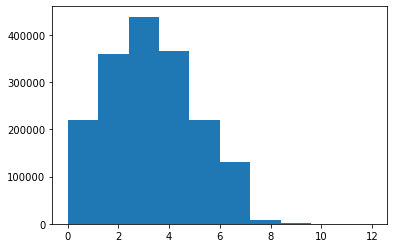

In [6]:

# Example 2 - Pick out 13 cards from a deck, and place it back. How many are hearts?

cards = np.random.binomial(13, 0.25, population)
plt.hist(cards);

### Poisson Distribution

Events are independent of each other. Average time between events is known, but the exact timing is random.

https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.random.poisson.html#numpy.random.poisson
https://towardsdatascience.com/the-poisson-distribution-and-poisson-process-explained-4e2cb17d459

Examples - tickets received, cars driving past

(array([ 22.,  31., 231., 147., 167., 252.,  78.,  56.,  12.,   4.]),
 array([ 0. ,  1.4,  2.8,  4.2,  5.6,  7. ,  8.4,  9.8, 11.2, 12.6, 14. ]),
 <a list of 10 Patch objects>)

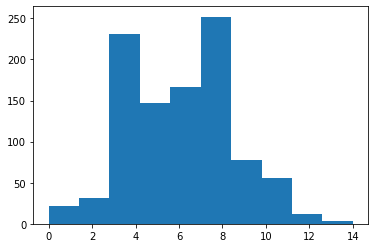

In [7]:
#numpy.random.poisson(lam, size)

# Example 1 - tickets received
# My team gets around 1000 tickets per week, which would mean a ticket every 5.9 mins on average

tickets = np.random.poisson(lam=5.9, size = 1000)

plt.hist(tickets)


### Exponential Distribution

Fewer large values, but more smaller values

https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.random.exponential.html#numpy.random.exponential
https://courses.lumenlearning.com/introstats1/chapter/the-exponential-distribution/

examples - chat handle times, how long products last (e.g. how long until Keela loses a hair band)

### Geometric Distribution

The number of attempts until success. e.g. the number of times a die was rolled until you got a 6.

https://minisham.redbrick.dcu.ie/CA/Notes/CA266/10_Geometric_Distribution.pdf
https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.random.geometric.html#numpy.random.geometric

examples - number of tickets solved until a csat was completed, videogame loot boxes

## Seeds and pseudorandom numbers

https://numpy.org/doc/stable/reference/random/index.html
https://numpy.org/doc/stable/reference/random/new-or-different.html#new-or-different
https://www.sharpsightlabs.com/blog/numpy-random-seed/
https://medium.com/@debanjana.bhattacharyya9818/numpy-random-seed-101-explained-2e96ee3fd90b

While the numbers generated by Numpy's Random functions may appear truly random to the human eye, they do in fact have an element of predictability and consistency. Numpy makes use of what is called a "seed" to determine the starting numpy, which can then be manipulated by its algorithm to create a series of numbers that look random. Due to this processes not being totally random, we refer to it as "pseudorandom". 

### How does Numpy determine the "seed"?

For processes like this, it is common to the current time as the seed by default. By based the seed on the milisecond that the process was run, the user will see a different set of pseudorandom numbers generated each time, while also making it incredibly unlikely that someone will guess what the original seed was. 

Alternatively, the user can explicitly specify the seed manually. This allows them to ensure that their results are reproducable, and has a number of use cases. For example, if someone is creating plots based on a pseudorandom sample, they may want to keep the data consistent while they tweak the formatting of the plots, thus allowing them to concentrate on one area, without having to react to another. Similarly if the user is looking to fit a machine learning algorithm to this data, and wants to see the impact of changing various parameters, it'll help to keep a consistent data set while they do so. 

Another strong use case for explicitly specifying is for teaching and workshops. The instructor can go through the steps of a given process with students at the same time, and as the students can specify the same seed as the instructor, it means that their results should match exactly. This ensures that any inconsistencies between the student's outputs and the teacher's are a result of other functions or methods that have been performed on that dataset, and not changes in the dataset itself. Were the seed not manually specified, each time the sample is taken it would change, thus increasing the chances that the instructor and the students output will look different as a result of sample itself. This use case will also be beneficial for colleagues working together, as they too can ensure they are singing from the same hymm sheet, so to speak.